In [31]:
import pandas as pd
import numpy as np


In [32]:
df = pd.read_csv("disease_symptoms.csv")


In [33]:
df.rename(columns={col: col.lower() for col in df.columns}, inplace=True)
df.rename(columns={col: col.replace('ptom_', '')
          for col in df.columns}, inplace=True)
df.drop_duplicates(inplace=True)


In [34]:
sym_lst = np.array([])

temp_df = df.iloc[:, 1:]

for sym in temp_df:
    sym_lst = np.hstack((sym_lst, temp_df[sym]))

symptoms = pd.DataFrame(sym_lst)
symptoms.drop_duplicates(inplace=True)
del(sym_lst)
del(temp_df)


In [35]:
sym_sev = pd.read_csv('../Symptom-severity.csv', index_col='Symptom')
sym_sev.drop_duplicates(inplace=True)


In [36]:
sym_sev.head()


,weight
Symptom,
itching,1
skin_rash,3
nodal_skin_eruptions,4
shivering,5
burning_micturition,6


In [37]:
symptoms.rename(columns={0: 'symptom'}, inplace=True)
symptoms.dropna(inplace=True)
symptoms['symptom'] = symptoms['symptom'].apply(lambda x: x.replace(' ', ''))
symptoms.set_index('symptom', inplace=True)
symptoms.head()


""
symptom
itching
skin_rash
continuous_sneezing
shivering
stomach_pain


In [38]:
symptoms['weights'] = np.nan


In [39]:
avg_weight = sym_sev['weight'].mean()


In [40]:
for index, item in symptoms.iterrows():
    try:
        symptoms.loc[index, 'weights'] = sym_sev.loc[index]['weight']
    except:
        symptoms.loc[index, 'weights'] = avg_weight


In [41]:
symptoms.head()


,weights
symptom,
itching,1.0
skin_rash,3.0
continuous_sneezing,4.0
shivering,5.0
stomach_pain,4.0


In [42]:
df["mean_sev"] = np.nan


In [43]:
for row in df.iloc[:, 1:].iterrows():

    curr_weight = []
    curr_max_sev = 0
    curr_min_sev = 0
    for sympt in row[1]:

        if type(sympt) is not float:
            wght = symptoms.loc[sympt.replace(' ', ''), 'weights']
            curr_weight.append(wght)
            curr_max_sev = max(curr_max_sev, wght)
            curr_min_sev = min(curr_min_sev,wght)

    df.loc[row[0], 'mean_sev'] = np.array(curr_weight).mean()
    df.loc[row[0], 'max_sev'] = curr_max_sev
    df.loc[row[0], 'min_sev'] = curr_max_sev


In [44]:
df.head(10)


,disease,sym1,sym2,sym3,sym4,sym5,sym6,sym7,sym8,sym9,...,sym11,sym12,sym13,sym14,sym15,sym16,sym17,mean_sev,max_sev,min_sev
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,4.0,4.0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.666667,4.0,4.0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,4.0,4.0
3,Fungal infection,itching,skin_rash,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.666667,4.0,4.0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.666667,4.0,4.0
10,Allergy,continuous_sneezing,shivering,chills,watering_from_eyes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.250000,5.0,5.0
11,Allergy,shivering,chills,watering_from_eyes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.333333,5.0,5.0
12,Allergy,continuous_sneezing,chills,watering_from_eyes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,4.0,4.0
13,Allergy,continuous_sneezing,shivering,watering_from_eyes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.333333,5.0,5.0
14,Allergy,continuous_sneezing,shivering,chills,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.333333,5.0,5.0


In [45]:
diseases = df.loc[:, ['disease', 'min_sev', 'mean_sev', 'max_sev']]
diseases=diseases.groupby('disease').agg({"mean_sev": 'mean', "max_sev": 'max', "min_sev":'min'})

In [46]:
def clean_word(string):
	s=string.lower().split(' ')
	s = [x for x in s if x != '']
	return ' '.join(s)

In [47]:
diseases.reset_index(inplace=True)
diseases['disease']=diseases['disease'].apply(clean_word)
diseases.set_index('disease',inplace=True)
diseases.sort_values(by=['mean_sev','max_sev','min_sev'])

,mean_sev,max_sev,min_sev
disease,,,
fungal infection,3.000000,4.0,4.0
chronic cholestasis,3.571429,4.0,4.0
drug reaction,3.600000,6.0,4.0
hepatitis b,3.600168,4.0,4.0
chicken pox,3.732727,7.0,4.0
acne,3.750000,4.0,4.0
diabetes,3.804938,4.0,4.0
psoriasis,3.833333,4.0,4.0
hypothyroidism,3.855769,4.0,4.0


In [48]:
%matplotlib inline


<AxesSubplot:xlabel='disease'>

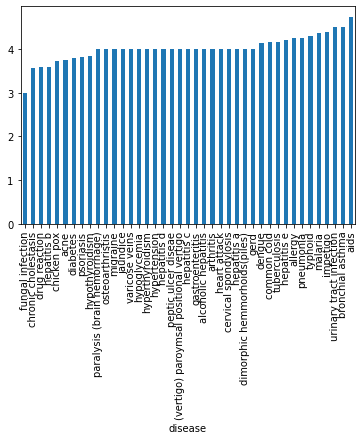

In [49]:
diseases['mean_sev'].sort_values().plot.bar()


In [50]:
discription_df = pd.read_csv('disease_description.csv')
discription_df['Disease'] = discription_df['Disease'].apply(clean_word)
discription_df.set_index('Disease',inplace=True)
discription_df.sort_index(inplace=True)
discription_df.head()

,Description
Disease,
(vertigo) paroymsal positional vertigo,Benign paroxysmal positional vertigo (BPPV) is...
acne,"Acne vulgaris is the formation of comedones, p..."
aids,Acquired immunodeficiency syndrome (AIDS) is a...
alcoholic hepatitis,"Alcoholic hepatitis is a diseased, inflammator..."
allergy,An allergy is an immune system response to a f...


In [51]:
diseases['discription'] = discription_df['Description']
diseases.head()

,mean_sev,max_sev,min_sev,discription
disease,,,,
(vertigo) paroymsal positional vertigo,4.00,4.0,4.0,Benign paroxysmal positional vertigo (BPPV) is...
aids,4.75,7.0,4.0,Acquired immunodeficiency syndrome (AIDS) is a...
acne,3.75,4.0,4.0,"Acne vulgaris is the formation of comedones, p..."
alcoholic hepatitis,4.00,4.0,4.0,"Alcoholic hepatitis is a diseased, inflammator..."
allergy,4.25,5.0,4.0,An allergy is an immune system response to a f...


In [52]:
precaution_df = pd.read_csv('disease_precaution.csv')
precaution_df['Disease'] = precaution_df['Disease'].apply(clean_word)
precaution_df.set_index('Disease',inplace=True)
precaution_df.sort_index(inplace=True)
precaution_df.head()

,Precaution_1,Precaution_2,Precaution_3,Precaution_4
Disease,,,,
(vertigo) paroymsal positional vertigo,lie down,avoid sudden change in body,avoid abrupt head movment,relax
acne,bath twice,avoid fatty spicy food,drink plenty of water,avoid too many products
aids,avoid open cuts,wear ppe if possible,consult doctor,follow up
alcoholic hepatitis,stop alcohol consumption,consult doctor,medication,follow up
allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching


In [53]:
def combine(data):
	s=''
	for x in data:
		if type(x) != float:
			s = s + "," + x
	return s[1:]

In [54]:
diseases['precautions'] = precaution_df.agg(combine,axis=1)
diseases.head()

,mean_sev,max_sev,min_sev,discription,precautions
disease,,,,,
(vertigo) paroymsal positional vertigo,4.00,4.0,4.0,Benign paroxysmal positional vertigo (BPPV) is...,"lie down,avoid sudden change in body,avoid abr..."
aids,4.75,7.0,4.0,Acquired immunodeficiency syndrome (AIDS) is a...,"avoid open cuts,wear ppe if possible,consult d..."
acne,3.75,4.0,4.0,"Acne vulgaris is the formation of comedones, p...","bath twice,avoid fatty spicy food,drink plenty..."
alcoholic hepatitis,4.00,4.0,4.0,"Alcoholic hepatitis is a diseased, inflammator...","stop alcohol consumption,consult doctor,medica..."
allergy,4.25,5.0,4.0,An allergy is an immune system response to a f...,"apply calamine,cover area with bandage,use ice..."


In [55]:
diseases.dtypes


mean_sev       float64
max_sev        float64
min_sev        float64
discription     object
precautions     object
dtype: object

In [56]:
diseases.loc['dimorphic hemmorhoids(piles)', 'discription'] = "Hemorrhoids, also spelled haemorrhoids, are vascular structures in the anal canal. In their ... Other names, Haemorrhoids, piles, hemorrhoidal disease ."


In [57]:
diseases.isna()

,mean_sev,max_sev,min_sev,discription,precautions
disease,,,,,
(vertigo) paroymsal positional vertigo,False,False,False,False,False
aids,False,False,False,False,False
acne,False,False,False,False,False
alcoholic hepatitis,False,False,False,False,False
allergy,False,False,False,False,False
arthritis,False,False,False,False,False
bronchial asthma,False,False,False,False,False
cervical spondylosis,False,False,False,False,False
chicken pox,False,False,False,False,False


In [58]:
diseases.to_csv("../data.csv")